In [47]:
import sys
import os
import numpy as np
import cortex
import matplotlib.pyplot as plt
import pickle
from nilearn.plotting import view_img
import nibabel as nib
import subprocess as sp
import shlex


In [48]:
test_data_path_merge = "/tank/shared/2022/arrow_of_time/arrow_of_time_exp/aot/analysis/glmsingle/outputs/mainexp/sub-001_ses-01_T1W_merge_direc_merge_runfix/TYPED_FITHRF_GLMDENOISE_RR.npy"

fs_dir = "/tank/shared/2022/arrow_of_time/derivatives/fmripreps/aotfull_preprocs/fullpreproc03/sourcedata/freesurfer"


test_data_merge = np.load(test_data_path_merge, allow_pickle=True).item()
# print(test_data)


for key in test_data_merge:
    print(key)
# R2 = test_data_merge['onoffR2']
R2_merge = test_data_merge["R2"]




test_data_path_nomerge = "/tank/shared/2022/arrow_of_time/arrow_of_time_exp/aot/analysis/glmsingle/outputs/mainexp/sub-001_ses-01_voxel/TYPED_FITHRF_GLMDENOISE_RR.npy"

fs_dir = "/tank/shared/2022/arrow_of_time/derivatives/fmripreps/aotfull_preprocs/fullpreproc03/sourcedata/freesurfer"

test_data_nomerge = np.load(test_data_path_nomerge, allow_pickle=True).item()
# print(test_data)

for key in test_data_nomerge:
    print(key)
# R2 = test_data_merge['onoffR2']
R2_nomerge = test_data_nomerge["R2"]

# print(betamean.shape)

R2_diff = R2_merge - R2_nomerge

HRFindex
HRFindexrun
glmbadness
pcvoxels
pcnum
xvaltrend
noisepool
pcregressors
betasmd
R2
R2run
rrbadness
FRACvalue
scaleoffset
meanvol
HRFindex
HRFindexrun
glmbadness
pcvoxels
pcnum
xvaltrend
noisepool
pcregressors
betasmd
R2
R2run
rrbadness
FRACvalue
scaleoffset
meanvol



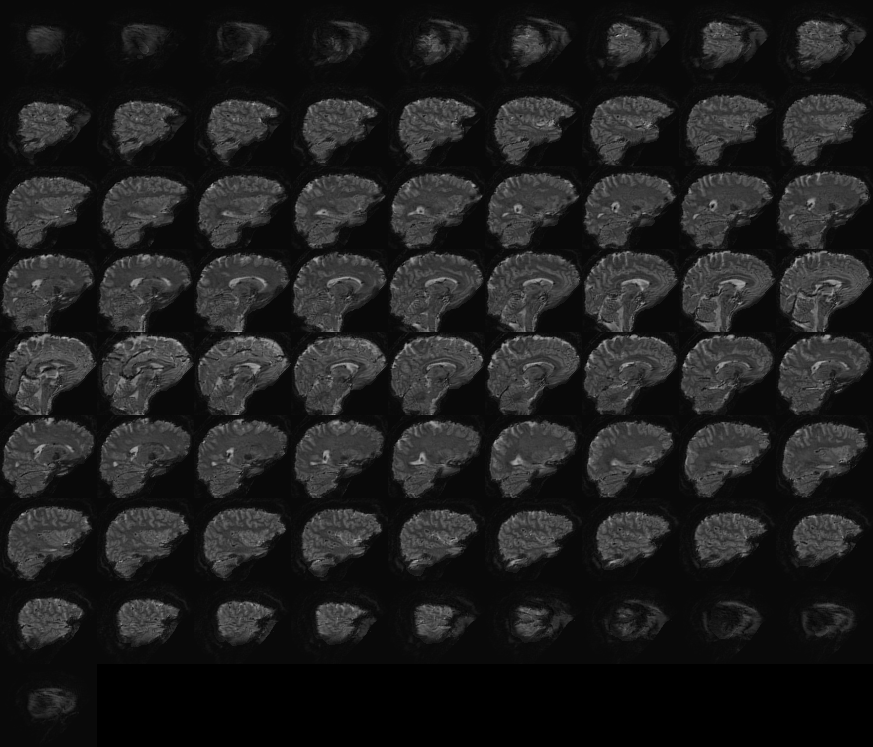
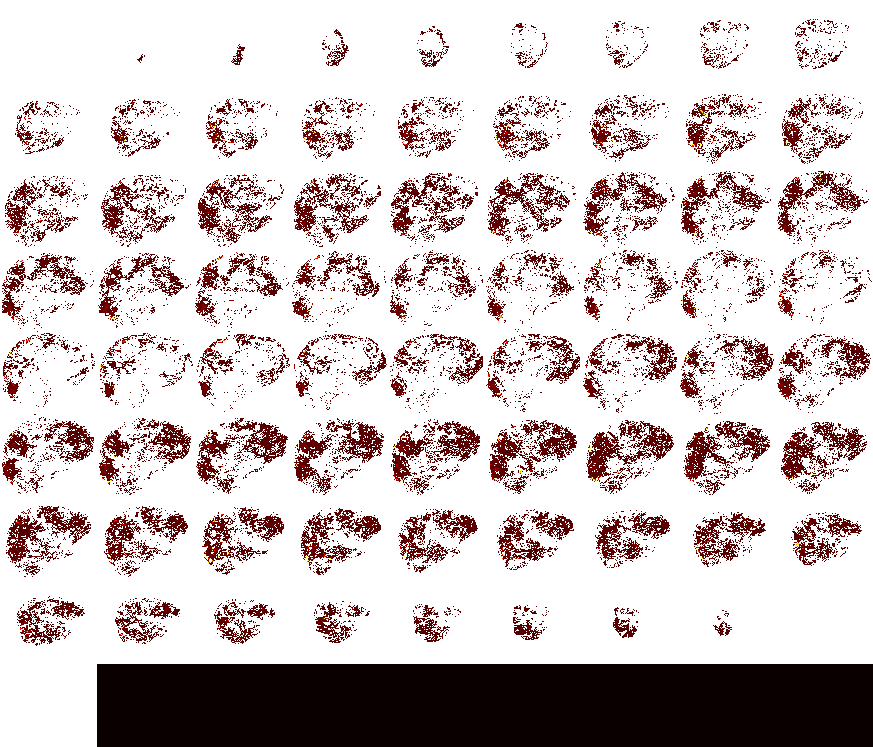

In [49]:
orig_image_fn = "/tank/shared/2022/arrow_of_time/derivatives/fmripreps/aotfull_preprocs/fullpreprocFinal_nofmriprepstc/sub-001/ses-01/func/sub-001_ses-01_task-AOT_run-1_space-T1w_desc-preproc_bold.nii.gz"
bg_image_fn = "/tank/shared/2022/arrow_of_time/derivatives/fmripreps/aotfull_preprocs/fullpreprocFinal_nofmriprepstc/sub-001/ses-01/func/sub-001_ses-01_task-AOT_run-1_space-T1w_boldref.nii.gz"
bm_image_fn = "/tank/shared/2022/arrow_of_time/derivatives/fmripreps/aotfull_preprocs/fullpreprocFinal_nofmriprepstc/sub-001/ses-01/func/sub-001_ses-01_task-AOT_run-1_space-T1w_desc-brain_mask.nii.gz"

bmask = nib.load(bm_image_fn).get_fdata().astype(bool)
R2_masked = np.zeros_like(R2_merge)
R2_masked[bmask] = R2_merge[bmask]
# betamean_masked = np.zeros_like(betamean)
# betamean_masked[bmask] = betamean[bmask]


orig_image = nib.load(orig_image_fn)
R2_img = nib.Nifti1Image(R2_masked, affine=orig_image.affine, header=orig_image.header)

view_img(
    R2_img, threshold=5, vmax=50, cmap="hot", symmetric_cmap=False, bg_img=bg_image_fn
)
# view_img(R2_img, cmap='hot', symmetric_cmap=False, bg_img=bg_image_fn)
# view_img(betamean_img, threshold=0.5, vmax=1, cmap='hot', symmetric_cmap=False, bg_img=bg_image_fn)

/tank/zhangs/anaconda3/lib/python3.9/site-packages/nilearn/plotting/js_plotting_utils.py:76: UserWarning: you have specified symmetric_cmap=False but the map contains negative values; setting symmetric_cmap to True
  warnings.warn('you have specified symmetric_cmap=False '



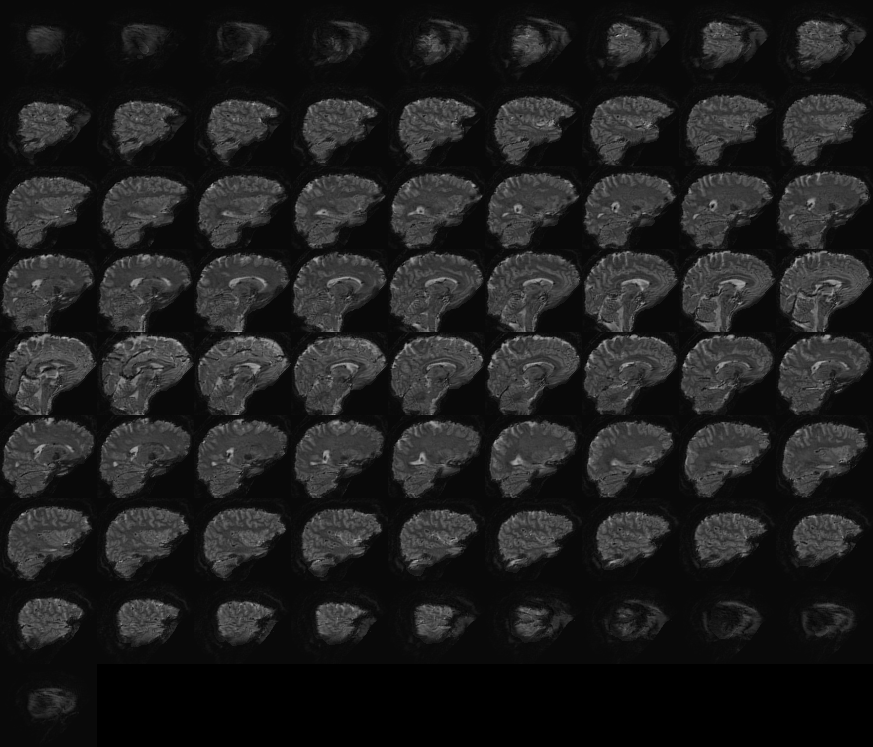
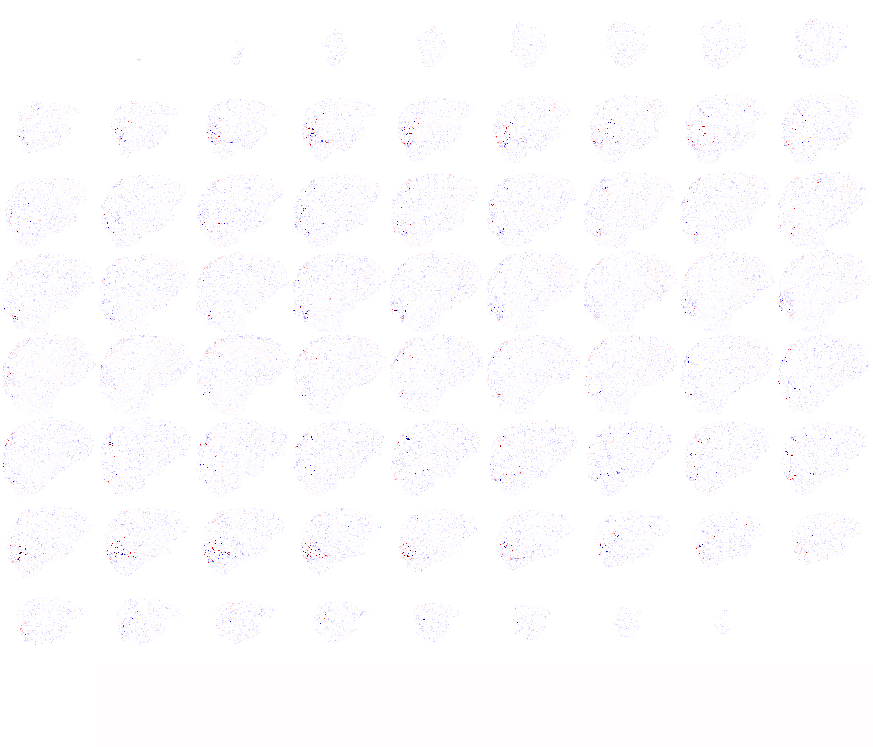

In [50]:
orig_image_fn = "/tank/shared/2022/arrow_of_time/derivatives/fmripreps/aotfull_preprocs/fullpreprocFinal_nofmriprepstc/sub-001/ses-01/func/sub-001_ses-01_task-AOT_run-1_space-T1w_desc-preproc_bold.nii.gz"
bg_image_fn = "/tank/shared/2022/arrow_of_time/derivatives/fmripreps/aotfull_preprocs/fullpreprocFinal_nofmriprepstc/sub-001/ses-01/func/sub-001_ses-01_task-AOT_run-1_space-T1w_boldref.nii.gz"
bm_image_fn = "/tank/shared/2022/arrow_of_time/derivatives/fmripreps/aotfull_preprocs/fullpreprocFinal_nofmriprepstc/sub-001/ses-01/func/sub-001_ses-01_task-AOT_run-1_space-T1w_desc-brain_mask.nii.gz"

bmask = nib.load(bm_image_fn).get_fdata().astype(bool)
R2_diff_masked = np.zeros_like(R2_diff)
R2_diff_masked[bmask] = R2_diff[bmask]

orig_image = nib.load(orig_image_fn)
R2_img = nib.Nifti1Image(
    R2_diff_masked, affine=orig_image.affine, header=orig_image.header
)

view_img(
    R2_img, cmap="seismic", symmetric_cmap=False, bg_img=bg_image_fn
)